## Exercici1
Crea una funció que donat un Array d’una dimensió, 
et faci un resum estadístic bàsic de les dades. Si detecta que l’array té més d’una dimensió, ha de mostrar un missatge d’error.

In [4]:
import numpy as np
import scipy.stats as spst
import matplotlib.pyplot as plt

#%% Functions
def randArrGen():
    
    dim1 = np.random.randint(1,20) 
    dim2 = np.random.randint(2,500)
    dimtup = ()
    
    #A silly condition, so that we have both cases
    if dim2%dim1 == 0 :
        dimtup = (dim1, dim2)
    
    else:
        dimtup = (dim1)
    
    #This way, rectangular arrays are created  
    
    return np.random.randint(0, 50, size=dimtup)    

def checkDim(aArray):
    
    is1Dim = False
    
    #for rectangular arrays, this is enough to verificate 1-dim
    if len(aArray.shape) == 1:
        is1Dim = True
    
    return is1Dim

def histogram(arr, arrMax, arrMin):
    
    #This could be done with np.histogram
    arrHist = np.array(range(arrMin, arrMax+1))
    arrCount = np.zeros(arrHist.shape)
    
    for i in arr:
        arrCount[arrHist[i - arrMin]-arrMin] += 1
    
    return arrHist, arrCount

def plotHistogram(x,y):
    
    plt.close()
    
    plt.interactive(True)    
    ax = plt.figure().gca()
    plt.title('Histograma de la matriu')
    plt.ylabel('Number of occurrence')
    plt.xlabel('Element in Array')
    
    #yAxis with only integers!!
    ax.yaxis.get_major_locator().set_params(integer=True)
    plt.grid()
    plt.bar(x,y)
    
def getMean(arr):
    
    #is len() or .size better?
    return np.sum(arr)/arr.size 

def getDesvest(arr, mean):

    return np.sqrt(np.sum((arr-mean)**2)/arr.size)

La moda es [[ 7 36]]
La mitjana es 21.5
La sigma es 14.5
DescribeResult(nobs=2, minmax=(7, 36), mean=21.5, variance=420.5, skewness=0.0, kurtosis=-2.0)


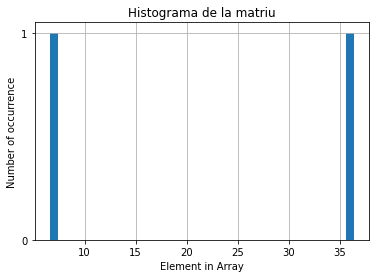

In [5]:
#%% Ex1

arr = randArrGen()

is1Dim = checkDim(arr)

if is1Dim:
    
    arrMax = np.amax(arr)
    arrMin = np.amin(arr)
    
    arrHist, arrCount = histogram(arr, arrMax, arrMin)    
    plotHistogram(arrHist, arrCount)
    
    #Works for more than one mode
    mode = np.where(arrCount == np.amax(arrCount) ) + arrMin
    print('La moda es', mode)
    
    mean = getMean(arr)
    print('La mitjana es', mean)
    
    desvest = getDesvest(arr, mean)
    print('La sigma es', desvest)
    
    print(spst.describe(arr)) #nice
    
else:
    print('Error, la matriu hauria de tenir 1 dimensio')
    

## Exercici 2
Crea una funció que et generi un quadrat NxN de nombres aleatoris entre el 0 i el 100.

In [6]:
        
def nxn100(): #Random nxn (at most 50x50) matrixes
    
    dim = np.random.randint(1,50)     
    return np.random.randint(0, 101, size=(dim, dim))

In [7]:
#%% Ex2

nxn100 = nxn100()

print(nxn100)

[[ 25  69  61  36  40   0  47   6  81  11  31  40  14   5  60  25   5  64
   70  13  46  29  57  60  97  75  46  68  23  42]
 [ 59  90  49  93  18  55  64  46  31  52  93  25  13  45  77  17  46  37
   54   3  88  82  52  27   1  97  40  27  24  43]
 [ 42   1   5  95  15  78  19  51  44  11  59  93  33   6  64  24  44  30
   11  34  87  57   7  14  80  37  96  81  52  10]
 [ 90  42  18  62  77  17  34  78  39  52   4  46  60  52  92  38  48  11
    8  99  87  16  64  28  74  28  47  40  32  82]
 [ 46  37 100  43  82  19  73  81  51  95   4  55   4  46  79  95  88  66
   32  83   1  97  84  39  54  72  50  20  82  46]
 [ 45  64  54  79  50  98  33  10  90  98  84  15  39  91  29  61  99  12
   17  77  94  50  30   9  50  74   6  91  59  78]
 [ 72  99  52  26  86  72  86  11  37  71  21  13  93  30  41  99  96  77
    9  27  86  43  25  98   1  45  30  54  31  72]
 [  8  57  18  12  74  17  78  95  34  44  56  76  73  22  69  75  32  42
   46  77  34  37  76  37  13  40  19  56  71  69]


## Exercici 3
Crea una funció que donada una taula de dues dimensions, et calculi els totals per fila i els totals per columna. 

In [8]:
def totalRowsColumns(arrNxn):
    
    sumRows = [np.sum(i) for i in arrNxn] #the elements inside the array, are the lists conforming the rows
    
    #To sum the columns we have to do a bit of slicing
    sumColumns = [np.sum(arrNxn[:,i]) for i in range(arrNxn.shape[1])]
                  
    return sumRows, sumColumns

In [9]:
#%% Ex3

sumRows, sumColumns = totalRowsColumns(nxn100)

print('Suma de les files:\n',sumRows)
print('Suma de les columnes:\n',sumColumns)

Suma de les files:
 [1246, 1448, 1280, 1465, 1724, 1686, 1603, 1457, 1809, 1288, 1472, 1486, 1533, 1401, 1148, 1375, 1620, 1505, 1335, 1491, 1689, 1445, 1665, 1517, 1601, 1639, 1610, 1423, 1418, 1599]
Suma de les columnes:
 [1462, 1745, 1310, 1709, 1443, 1564, 1864, 1267, 1541, 1545, 1328, 1606, 1266, 1619, 1576, 1371, 1333, 1466, 1502, 1261, 1668, 1764, 1638, 1497, 1399, 1601, 1268, 1387, 1225, 1753]


## Exercici 4
Implementa manualment una funció que calculi el coeficient de correlació. Informa’t-en sobre els seus usos i interpretació.

In [10]:
def oneDimRandGen():
    dim = np.random.randint(50,200)
    
    return np.random.randint(0, 50, size= (dim))
    
def correlationCoef(x,y):
    
    xMean = getMean(x)    
    yMean = getMean(y)
    
    return (np.sum((x-xMean)*(y-yMean)))/(np.sqrt(np.sum((x-xMean)**2)*np.sum((y-yMean)**2)))

In [11]:
#%% Ex4

x = oneDimRandGen()

#x = np.linspace(0,50,20) #This would yield a correlation coeficient of 1

y = np.linspace(100, 500, x.size) #For our function, both arrays must be the same length

print(correlationCoef(x, y))

0.044694064068280574
